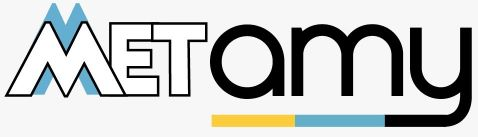

# DATA ANALYSIS WITH PYTHON 

# Data Analysis with Python Capstone Project

# Netflix

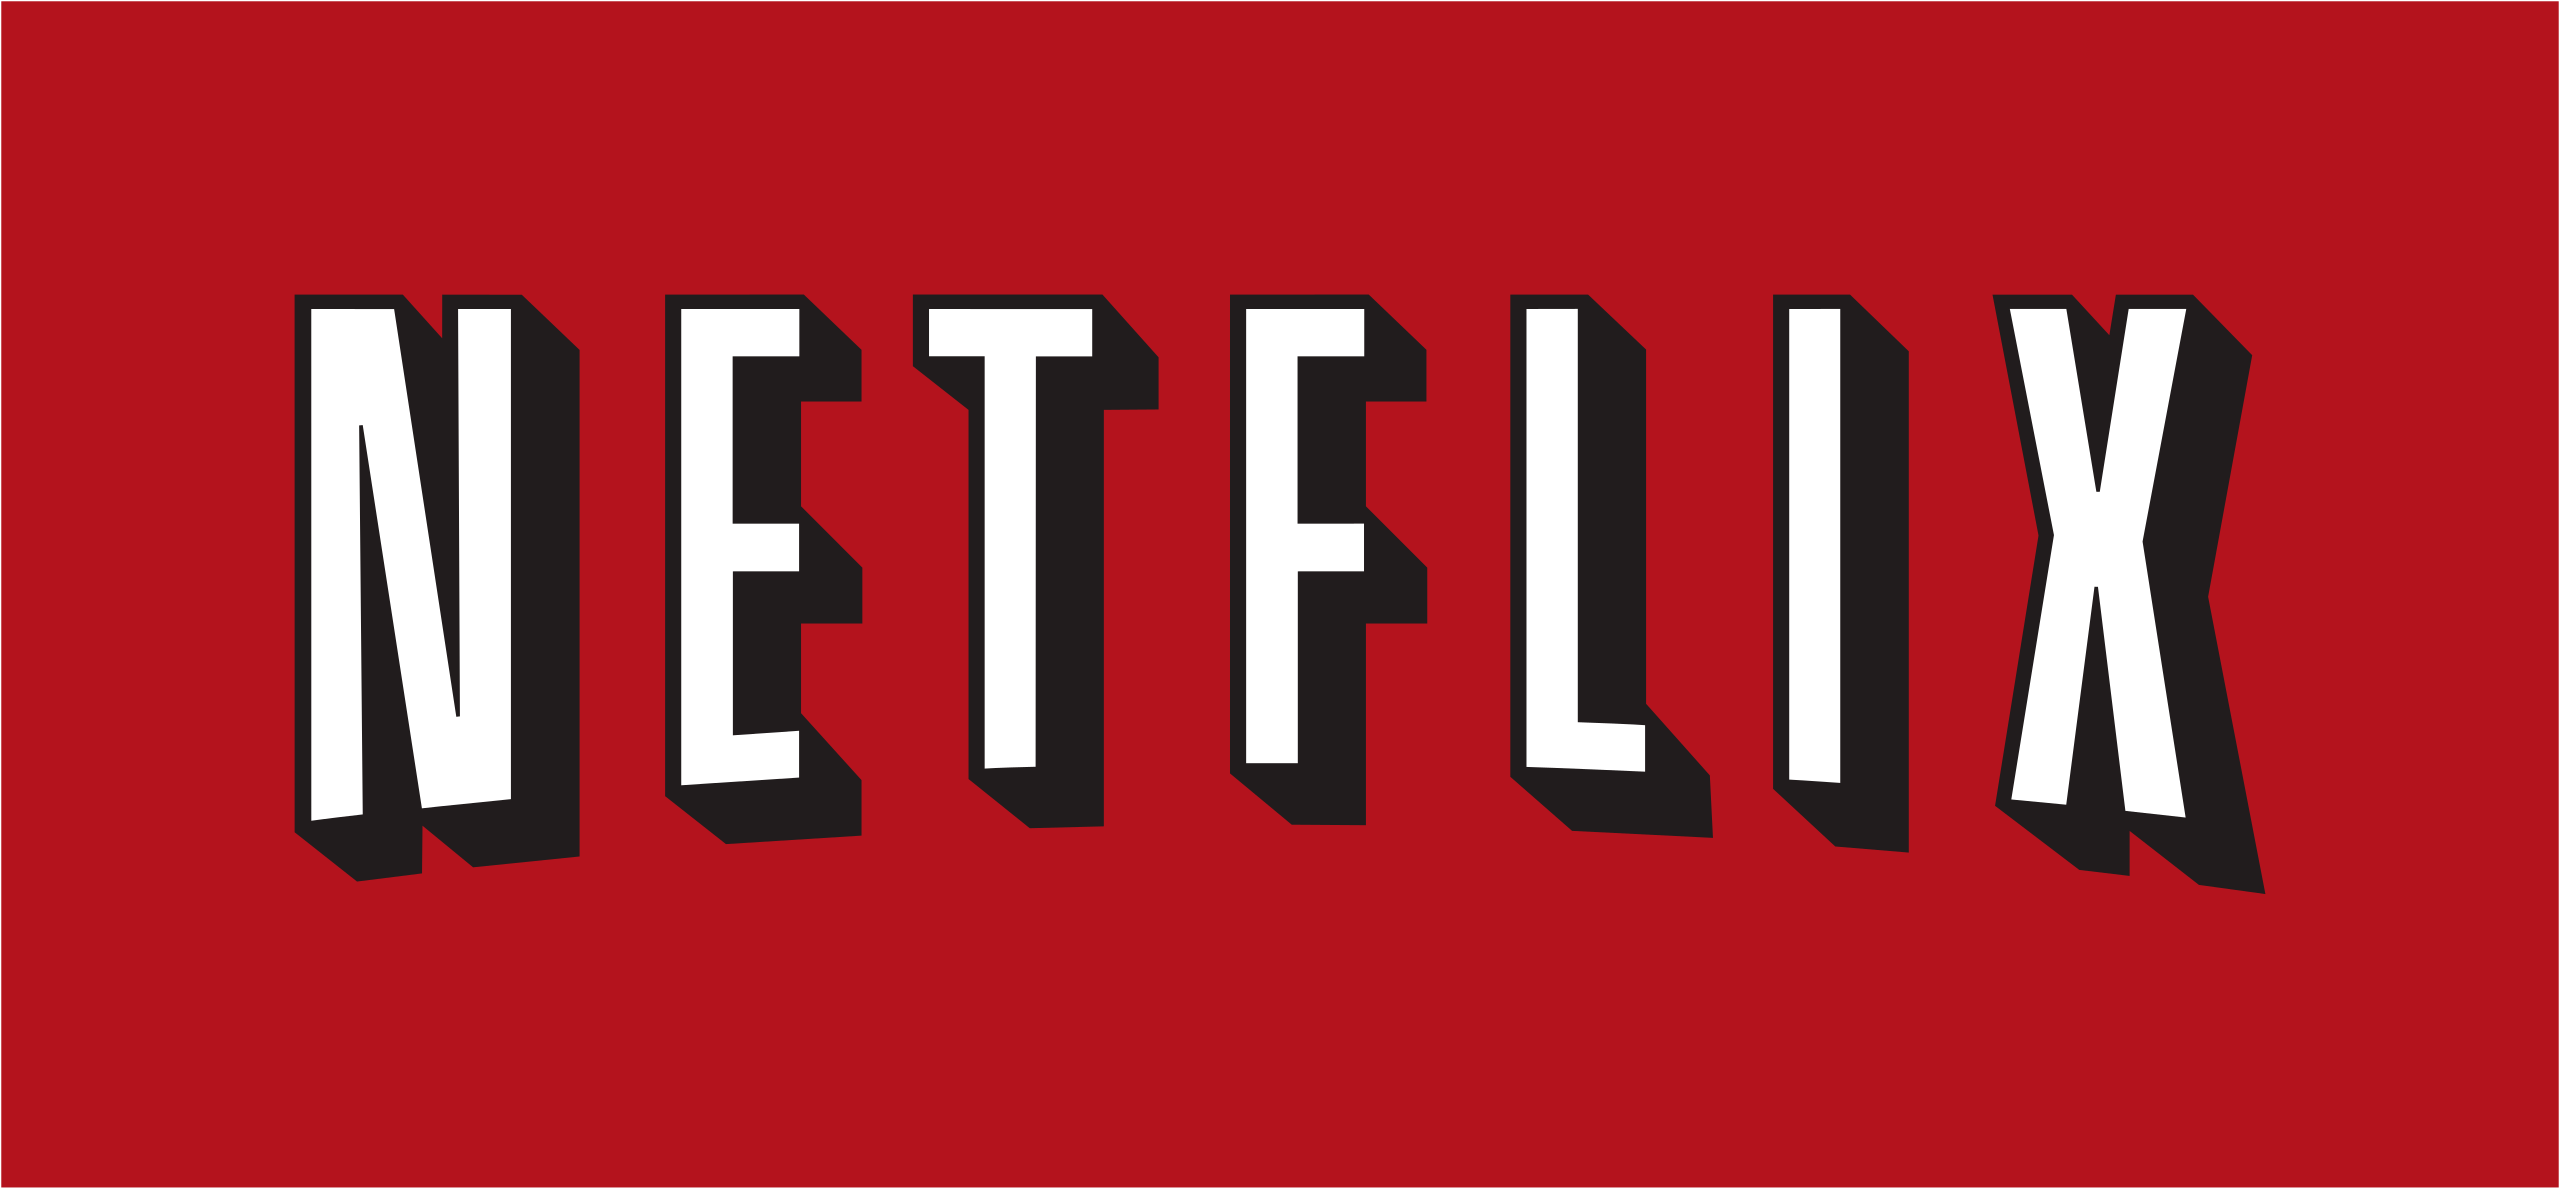

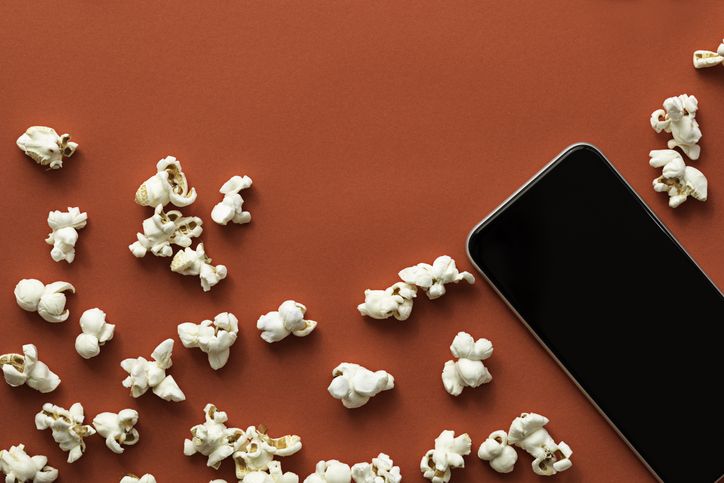

## Information on the Data Set

**This dataset contains more than 8,500 Netflix movies and TV shows, including cast members, duration, and genre.**<br><br>
**It contains titles added as recently as late September 2021.**

**Not sure where to begin? Scroll to the bottom to find challenges!**

**Netflix! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.**

**A talent agency has hired you with your team to analyze patterns in the professional relationships of cast members and directors. You can limit the actors to the first four names listed in cast. The client is interested in any insights you can derive from your Netflix network analysis, such as actor/actor and actor/director pairs that work most closely together, most popular actors and directors to work with, and graph differences over time. You will need to prepare a report that is accessible to a broad audience. It will need to outline your motivation, analysis steps, findings, and conclusions.**


**Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your data manipulation skills. One of your friend in your team has performed an initial analysis and said that  the average duration of movies has been declining. He believes if your team can explain some of the factors that may be contributing to the shortening movie lengths.**


**You have been supplied with the dataset netflix_data.csv , along with the following table detailing the column names and descriptions:**

---

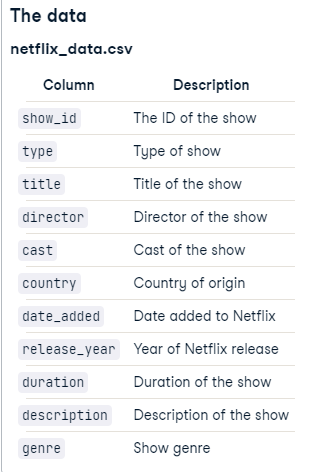

**Your friend suspects that movies are getting shorter and they've found some initial evidence of this. Having peaked your interest, you will perform exploratory data analysis on the "netflix_data.csv" to understand what may be contributing to movies getting shorter over time. Your analysis may follow the following steps as a starting point:**<br><br>




- Investigate and subset the Netflix data by "Movie" type, keeping only the columns "title", "country", "genre", "release_year", "duration", saving this into a new DataFrame called netflix_movies.

- Filter netflix_movies to find the movies that are shorter than 60 minutes, and inspect the result to find possible contributing factors.

- Using a for loop, assign colors of your choice to four genre groups from netflix_movies, ("Children", "Documentaries", "Stand-Up", and "Other") saving them to a colors list, and use this to initialize a figure object and create a scatter plot for movie duration by release year using the labels "Release year" for the x-axis, "Duration (min)" for the y-axis, and the title "Movie Duration by Year of Release".


- After inspecting the plot, answer the question "Are we certain that movies are getting shorter?" by assigning either "yes", "no", or "maybe" to the variable answer.

**Again, your client is interested in any insights you can derive from data set. For instance, following analysis might be helpful:**<br><br>

- Replacing missing countries with "Not Specify", missing directors with "No Director", missing cast with "No Cast"


- How much variety exists in Netflix's offering? Base this on three variables: type, country, and listed_in.



- Build a word cloud from the movie and TV shows descriptions. Make sure to remove stop words! (world cloud library)



- Has Netflix invested more in certain genres (see listed_in) in recent years? What about certain age groups (see ratings)?

In [35]:
# import related libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# in order to set the parameters that control the general style of the plots. 
plt.rcParams["figure.figsize"] = (10, 6)
sns.set_style("whitegrid")

# in order to set the value of the specified option.
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# to set it "100" to display all rows in the dataframe
pd.set_option('display.max_rows', 100)

#  to set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [37]:
df = pd.read_csv("netflix_dataset.csv", index_col=0)
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


## <span class="burk">Getting to Know a Dataset</span>

### Initial Exploration

### Data Validation

### Data Summarization

## <span class="burk">Data Cleaning and Imputation</span>

### Addressing with Missing Data

### Converting and Analyzing Categorical Data

### Working with Numeric Data

### Handling Outliers

## <span class="burk">Relationship in Data</span>

### Patterns Over Time

### Correlation

### Factor Relationships and Distributions

## <span class="burk">Turning Exploratory Analysis into Action</span>

### Considerations for Categorical Data

### Generating New Features

### Generating Hypotheses

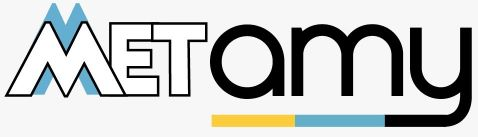